## World Happiness Report 2023 - Exploratory Data Analysis

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

**World Happiness Report Dataset**

In [38]:
happy_df = pd.read_csv("whr2023.csv")

In [39]:
happy_df.head()

,Country name,iso alpha,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,AFG,South Asia,1.859,0.033,1.923,1.795,7.324,0.341,54.712,...,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,Albania,ALB,Central and Eastern Europe,5.277,0.066,5.406,5.148,9.567,0.718,69.150,...,-0.007,0.878,1.778,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,Algeria,DZA,Middle East and North Africa,5.329,0.062,5.451,5.207,9.300,0.855,66.549,...,-0.117,0.717,1.778,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,Argentina,ARG,Latin America and Caribbean,6.024,0.063,6.147,5.900,9.959,0.891,67.200,...,-0.089,0.814,1.778,1.590,1.388,0.427,0.587,0.088,0.082,1.861
4,Armenia,ARM,Commonwealth of Independent States,5.342,0.066,5.470,5.213,9.615,0.790,67.789,...,-0.155,0.705,1.778,1.466,1.134,0.443,0.551,0.053,0.160,1.534


**Filter the columns and copy only the ones that will be used for analysis.**

In [40]:
happy_df.drop(["Standard error of ladder score","upperwhisker","Ladder score in Dystopia","Explained by: Log GDP per capita",
           "Explained by: Social support","Explained by: Healthy life expectancy","lowerwhisker",
           "Explained by: Freedom to make life choices","Explained by: Generosity","Explained by: Perceptions of corruption",
           "Dystopia + residual"],axis=1,inplace=True)

In [41]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  137 non-null    object 
 1   iso alpha                     137 non-null    object 
 2   Regional indicator            137 non-null    object 
 3   Happiness score               137 non-null    float64
 4   Logged GDP per capita         137 non-null    float64
 5   Social support                137 non-null    float64
 6   Healthy life expectancy       136 non-null    float64
 7   Freedom to make life choices  137 non-null    float64
 8   Generosity                    137 non-null    float64
 9   Perceptions of corruption     137 non-null    float64
dtypes: float64(7), object(3)
memory usage: 10.8+ KB


In [42]:
happy_df.isnull().sum()

Country name                    0
iso alpha                       0
Regional indicator              0
Happiness score                 0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         1
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [43]:
happy_df[happy_df.isnull().any(axis = 1)]

,Country name,iso alpha,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
116,State of Palestine,PSE,Middle East and North Africa,4.908,8.716,0.859,NaN,0.694,-0.132,0.836


In [44]:
numerical_columns = ['Happiness score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
happy_df[numerical_columns].describe()

,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401
std,1.139929,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.724000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000
50%,5.684000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000
75%,6.334000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


### Create a function that displays the distribution of numerical data using both histograms and boxplots.

In [45]:
def show_distribution(var):
    var_min = happy_df[var].min()
    var_mean = happy_df[var].mean()
    var_median = happy_df[var].median()
    var_mode = happy_df[var].mode()[0]
    var_max = happy_df[var].max()
    
    # Histogram 
    fig, ax = plt.subplots(2, 1, figsize = (8,8))
    sns.histplot(happy_df, x = var, kde = True, color = 'red', alpha = 0.2, ax = ax[0])
    ax[0].set_ylabel("Frequency")
    
    ax[0].axvline(x = var_min, color = 'gray', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_mean, color = 'blue', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_median, color = 'brown', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_mode, color = 'cyan', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_max, color = 'gray', linewidth = 2, linestyle = "--")
    
    # Box plot
    sns.boxplot(happy_df, x = var, width = 0.3, ax = ax[1],)
    ax[1].set_xlabel("Value")
    
    fig.suptitle("Data Distribution - " + var, size = 15)
    fig.show()

### show_distribution function

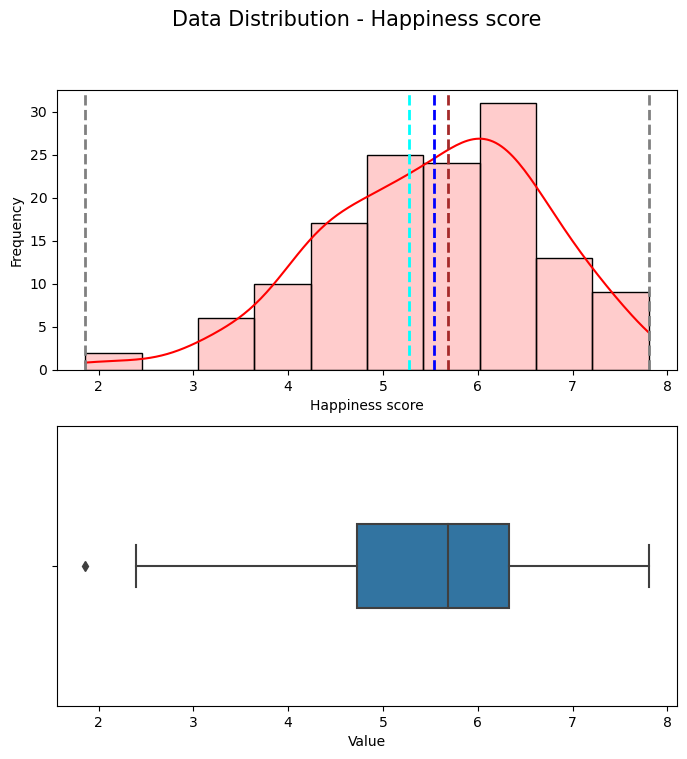

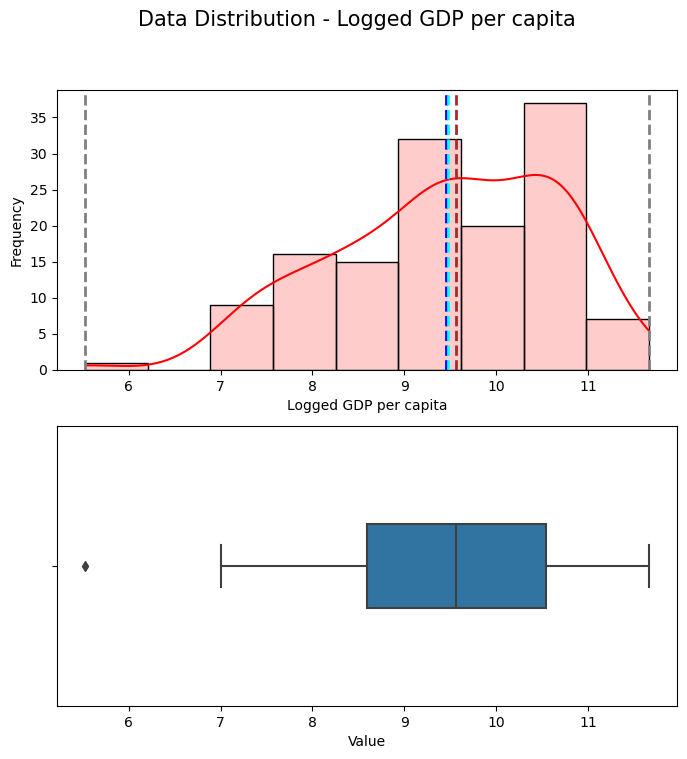

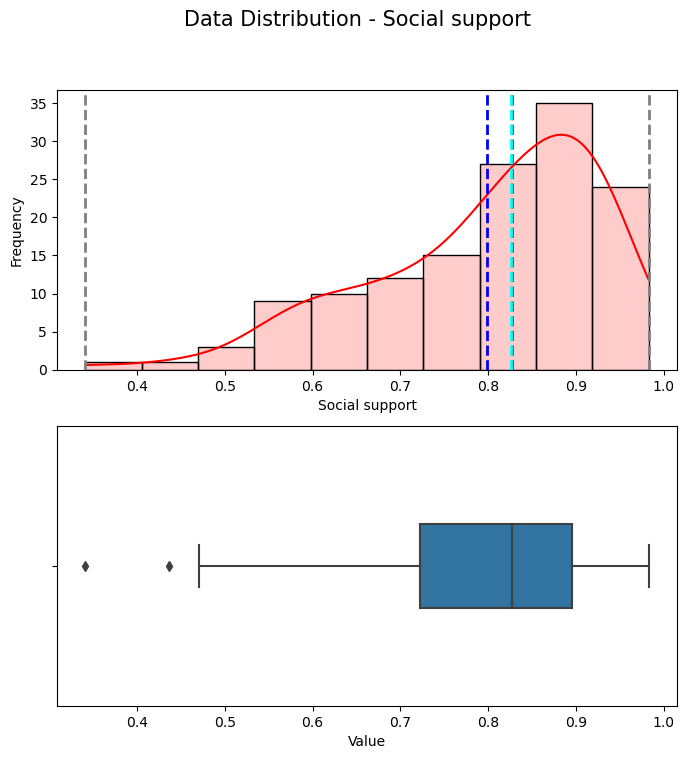

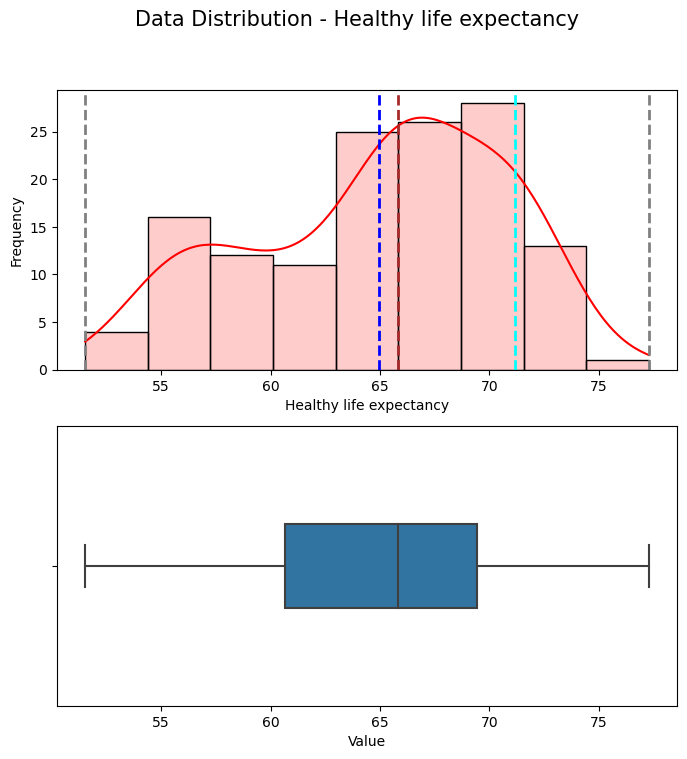

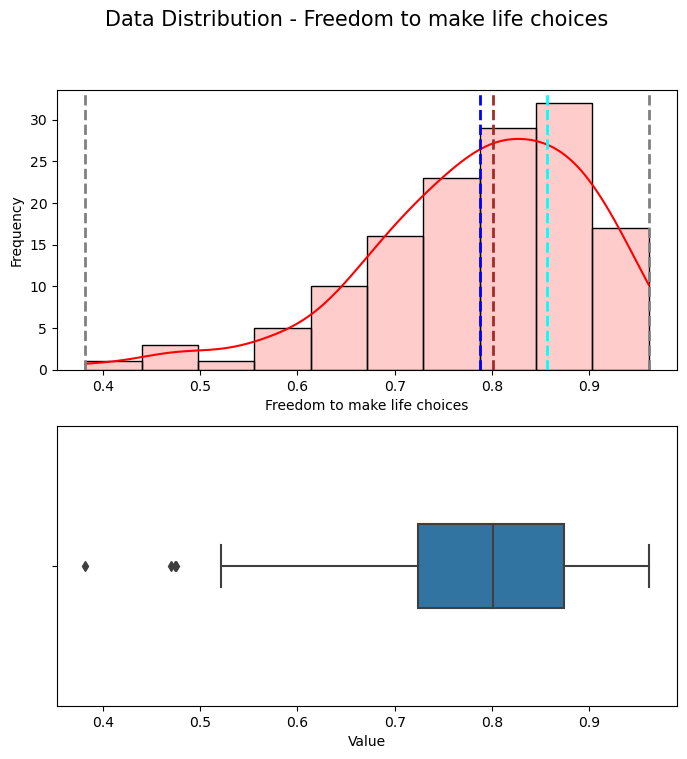

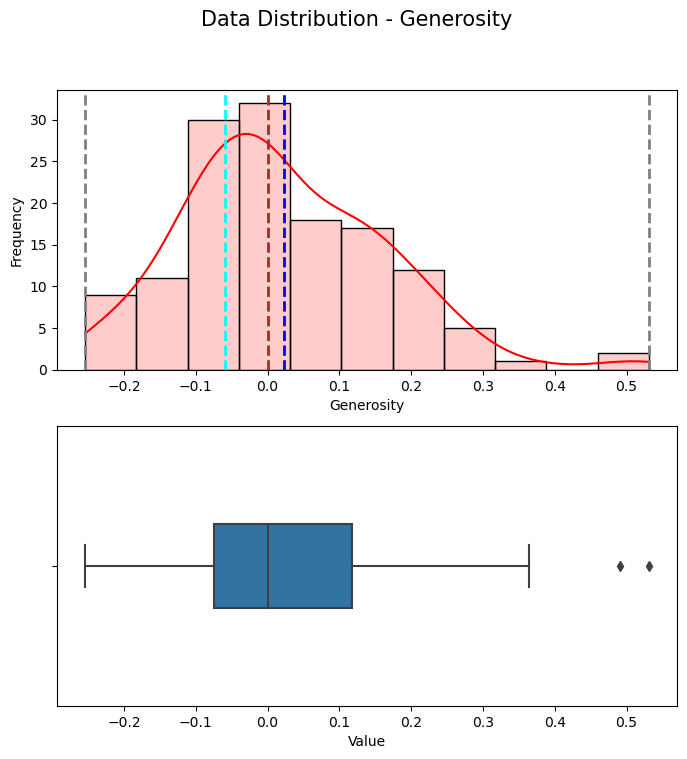

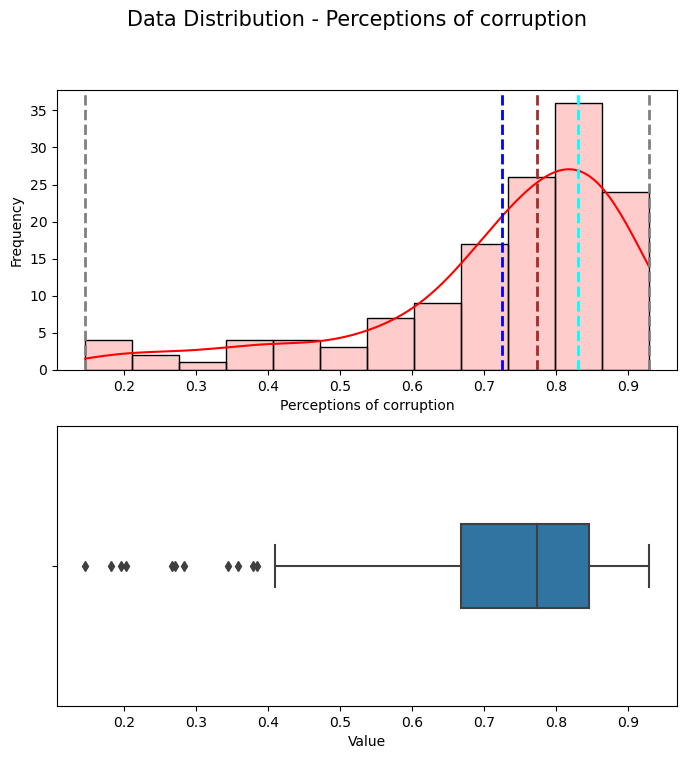

In [46]:
for column in numerical_columns:
    show_distribution(column)

**Generate a heatmap to identify the correlation**

<Axes: >

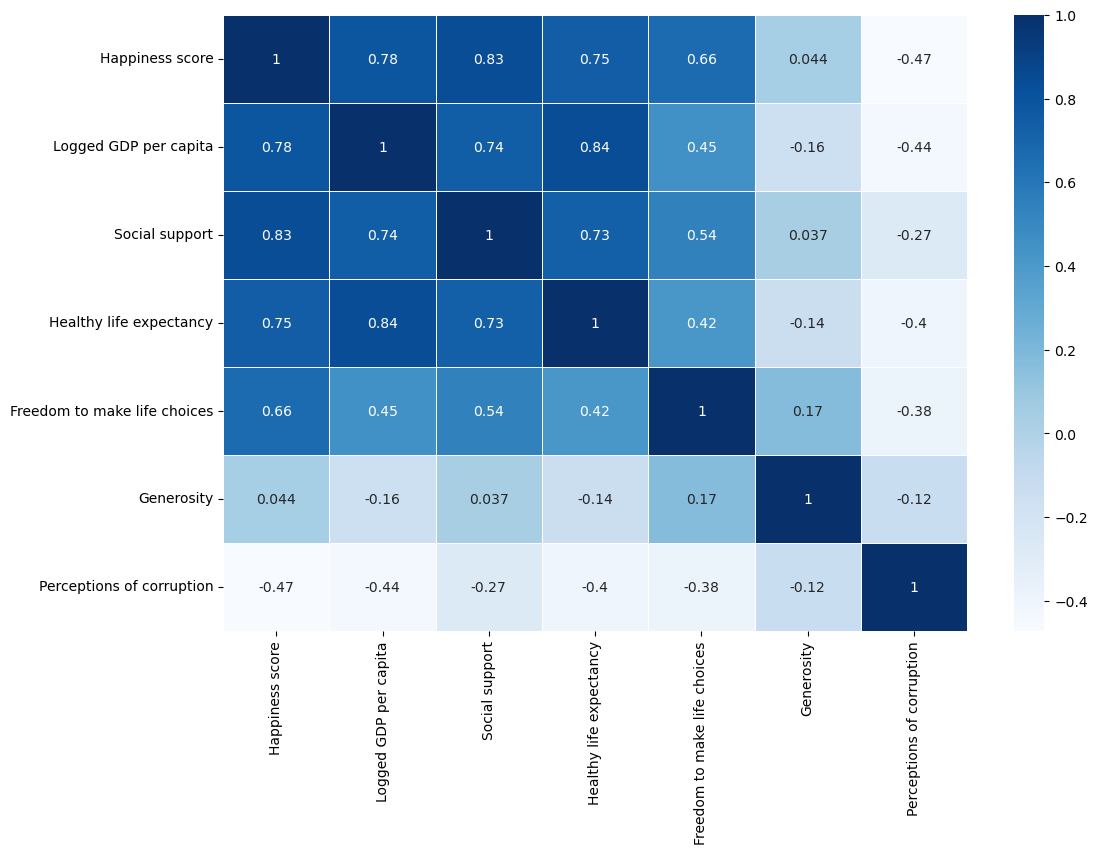

In [47]:
corr = happy_df.corr()
fig = plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap = 'Blues', linewidth = 0.5, annot = True)

### Happiness score vs other factors

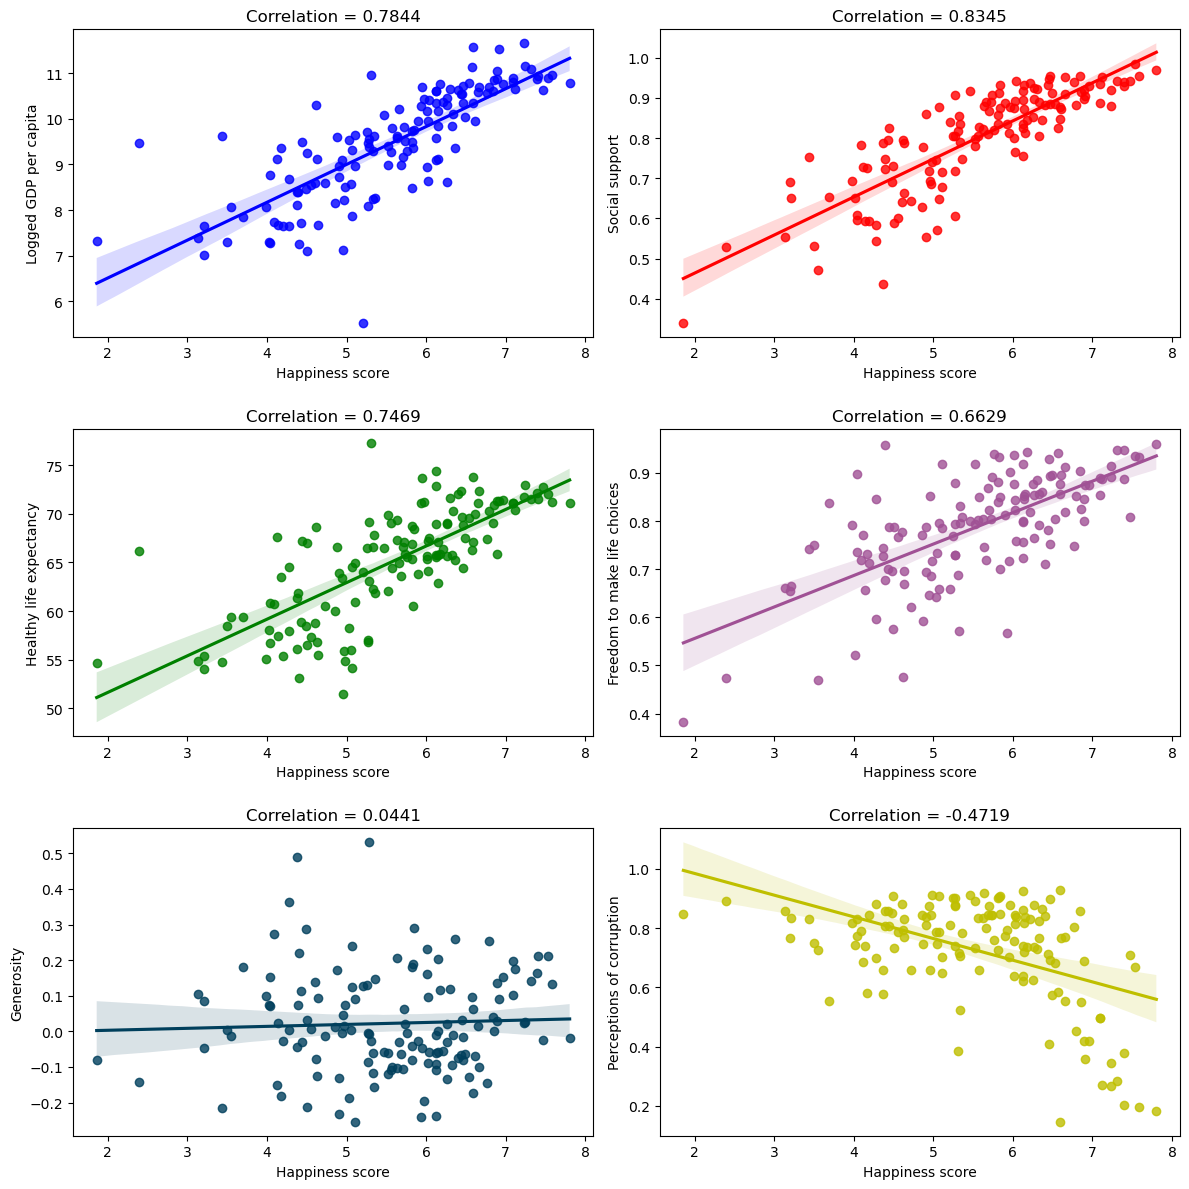

In [53]:
tab_20_colors = ["b", "r", "g", "#a05195", "#003f5c", "y"]
fig, ax = plt.subplots(3, 2, figsize = (12,12))
i = 0
for j, column in enumerate(numerical_columns[1:]):
    corr = happy_df['Happiness score'].corr(happy_df[column])
    sns.regplot(happy_df, x = "Happiness score", y = column, color = tab_20_colors[i], ax = ax[j//2, j%2])
    ax[j//2, j%2].set_title("Correlation = {:.4f}".format(corr))
    i += 1 
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.show()

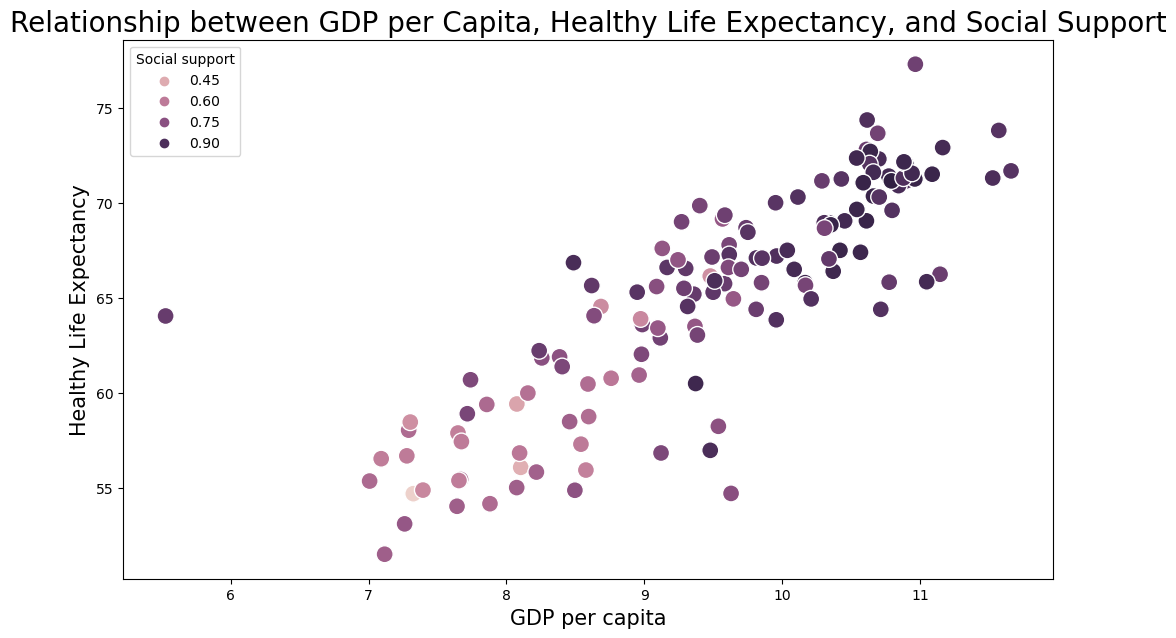

In [54]:
fig = plt.figure(figsize = (12,7))
sns.scatterplot(happy_df, x = "Logged GDP per capita", y = "Healthy life expectancy", hue = "Social support", s = 150)
plt.xlabel("GDP per capita", size = 15)
plt.ylabel("Healthy Life Expectancy", size = 15)   
plt.title("Relationship between GDP per Capita, Healthy Life Expectancy, and Social Support", size = 20)
plt.show()

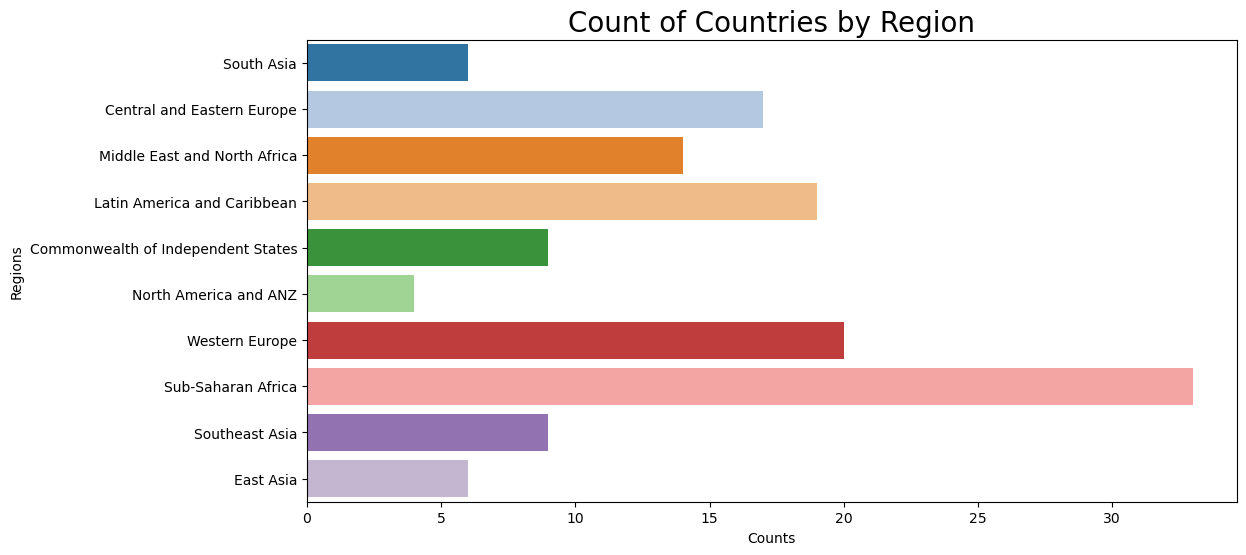

In [55]:
fig = plt.figure(figsize = (12,6))
sns.countplot(happy_df, y = 'Regional indicator', palette = 'tab20')
plt.ylabel("Regions")
plt.xlabel("Counts")
plt.title("Count of Countries by Region", size = 20)
plt.show()

### Boxplot

Text(0.5, 1.0, 'Happiness Score by region')

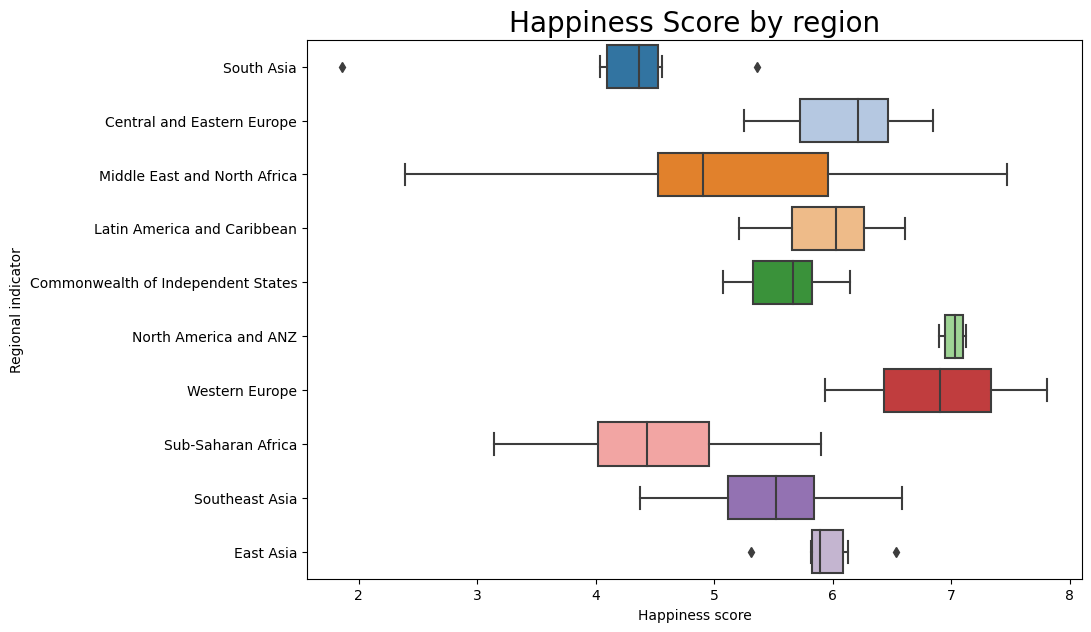

In [56]:
fig = plt.figure(figsize = (10,7))
sns.boxplot(happy_df, y = 'Regional indicator', x = "Happiness score", palette = 'tab20')
plt.title("Happiness Score by region", size = 20)

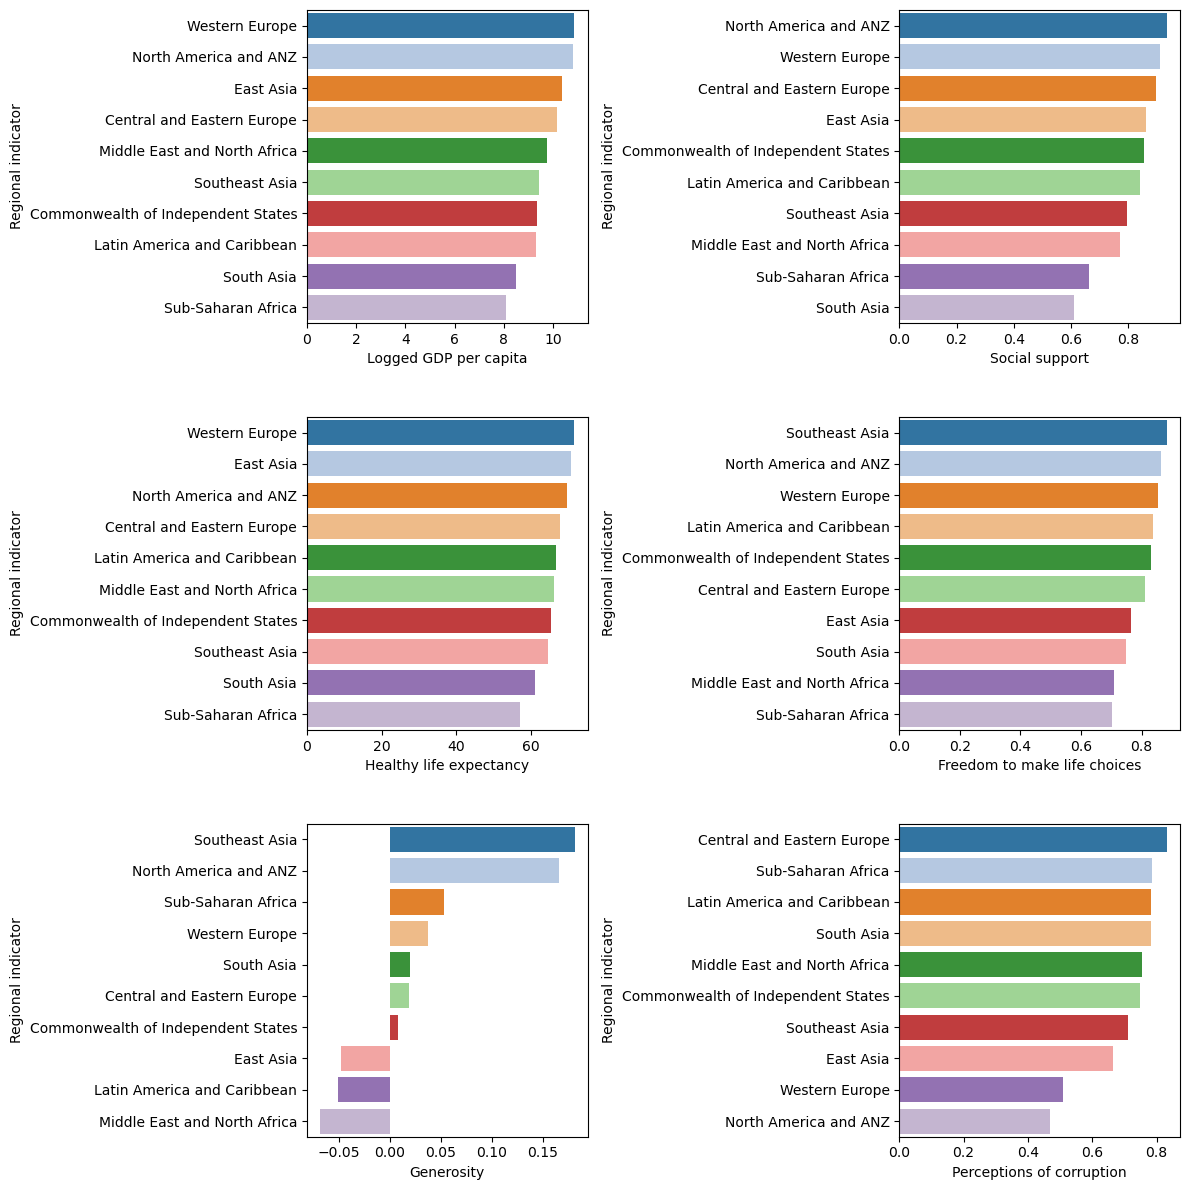

In [57]:
region_wise = happy_df.groupby("Regional indicator")[numerical_columns].mean().reset_index()
fig, ax = plt.subplots(3, 2, figsize = (12,12))
for i, column in enumerate(numerical_columns[1:]):
    region_wise.sort_values(column, ascending = False, inplace = True)
    sns.barplot(region_wise, x = column, y = 'Regional indicator', palette = 'tab20', ax = ax[i//2, i%2])
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.show()

### created to analyze the top 10 happiest and least happy countries.

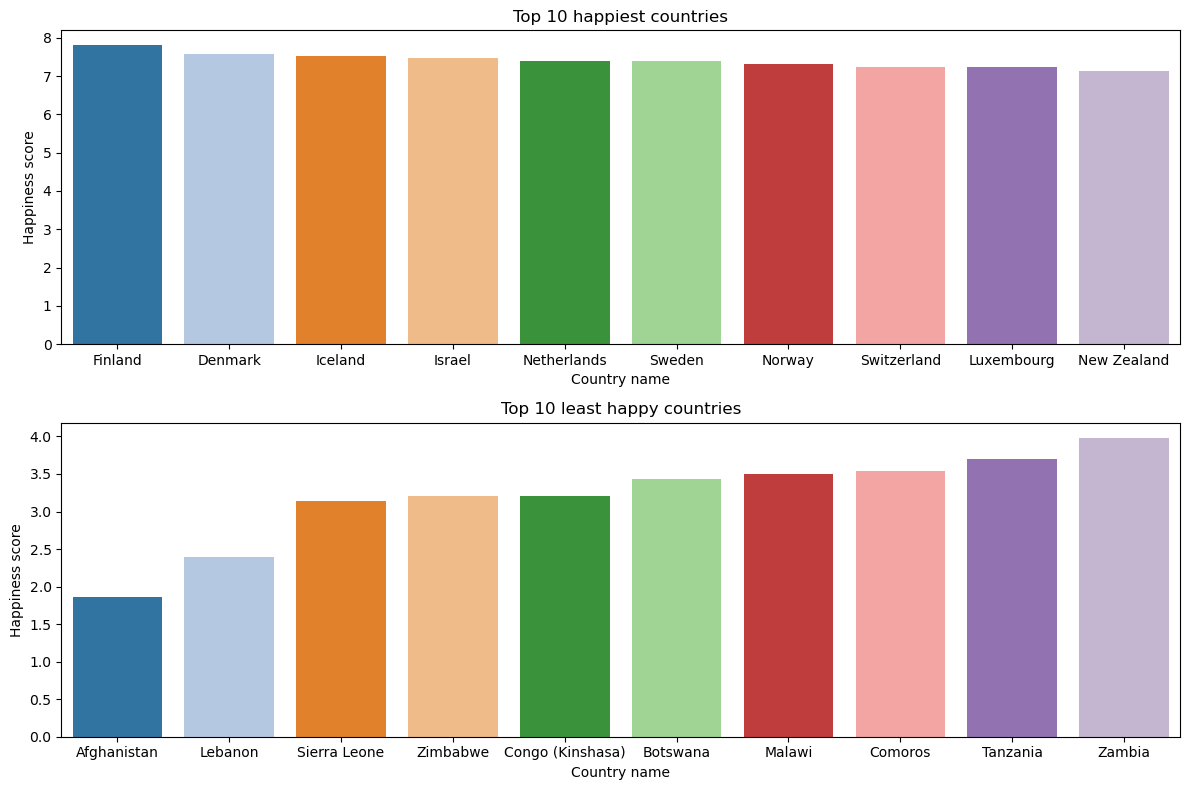

In [58]:
top_10_happy_country = happy_df.sort_values('Happiness score', ascending = False)
bottom_10_happy_country = happy_df.sort_values('Happiness score', ascending = True)

fig, ax = plt.subplots(2, 1, figsize = (12,8))

sns.barplot(top_10_happy_country.iloc[:10], y = 'Happiness score', x = 'Country name', palette = 'tab20', ax = ax[0])
ax[0].set_title("Top 10 happiest countries")



sns.barplot(bottom_10_happy_country.iloc[:10], y = 'Happiness score', x = 'Country name', palette = 'tab20', ax = ax[1])
ax[1].set_title("Top 10 least happy countries")

fig.tight_layout()
fig.show()